In [16]:
from keras.applications import VGG16
#Load the VGG model
vgg_conv = VGG16(weights='imagenet', include_top=False, input_shape=(50, 50, 3))

In [17]:
# Freeze the layers except the last 4 layers
for layer in vgg_conv.layers[:-4]:
    layer.trainable = False
 
# Check the trainable status of the individual layers
for layer in vgg_conv.layers:
    print(layer, layer.trainable)

<keras.engine.input_layer.InputLayer object at 0x000001AB6AC13AC8> False
<keras.layers.convolutional.Conv2D object at 0x000001AB6ABEDDD8> False
<keras.layers.convolutional.Conv2D object at 0x000001AB6ABBEC88> False
<keras.layers.pooling.MaxPooling2D object at 0x000001AB6ABE7630> False
<keras.layers.convolutional.Conv2D object at 0x000001AB6ABC4160> False
<keras.layers.convolutional.Conv2D object at 0x000001AB6AC1DAC8> False
<keras.layers.pooling.MaxPooling2D object at 0x000001AB6AC16DA0> False
<keras.layers.convolutional.Conv2D object at 0x000001AB6AB328D0> False
<keras.layers.convolutional.Conv2D object at 0x000001AB6AB2C7B8> False
<keras.layers.convolutional.Conv2D object at 0x000001AB63071160> False
<keras.layers.pooling.MaxPooling2D object at 0x000001AB630849E8> False
<keras.layers.convolutional.Conv2D object at 0x000001AB63097898> False
<keras.layers.convolutional.Conv2D object at 0x000001AB6308BE80> False
<keras.layers.convolutional.Conv2D object at 0x000001AB523DB240> False
<ker

In [18]:
from keras import models
from keras import layers
from keras import optimizers
 
# Create the model
model = models.Sequential()
 
# Add the vgg convolutional base model
model.add(vgg_conv)
 
# Add new layers
model.add(layers.Flatten())
model.add(layers.Dense(1024, activation='relu'))
model.add(layers.Dropout(0.5))
model.add(layers.Dense(2, activation='softmax'))
 
# Show a summary of the model. Check the number of trainable parameters
model.summary()


_________________________________________________________________
Layer (type)                 Output Shape              Param #   
vgg16 (Model)                (None, 1, 1, 512)         14714688  
_________________________________________________________________
flatten_3 (Flatten)          (None, 512)               0         
_________________________________________________________________
dense_5 (Dense)              (None, 1024)              525312    
_________________________________________________________________
dropout_3 (Dropout)          (None, 1024)              0         
_________________________________________________________________
dense_6 (Dense)              (None, 2)                 2050      
Total params: 15,242,050
Trainable params: 7,606,786
Non-trainable params: 7,635,264
_________________________________________________________________


In [19]:
from keras.preprocessing.image import ImageDataGenerator, array_to_img
image_size = 50
train_dir = './images/training_data'
validation_dir = './images/testing_data'
train_datagen = ImageDataGenerator(
      rescale=1./255,
      rotation_range=20,
      width_shift_range=0.2,
      height_shift_range=0.2,
      horizontal_flip=True,
      fill_mode='nearest')
 
validation_datagen = ImageDataGenerator(rescale=1./255)
 
# Change the batchsize according to your system RAM
#train_batchsize = 100
#val_batchsize = 10

train_batchsize = 1
val_batchsize = 1
 
train_generator = train_datagen.flow_from_directory(
        train_dir,
        target_size=(image_size, image_size),
        batch_size=train_batchsize,
        class_mode='categorical')
 
validation_generator = validation_datagen.flow_from_directory(
        validation_dir,
        target_size=(image_size, image_size),
        batch_size=val_batchsize,
        class_mode='categorical',
        shuffle=False)

Found 4 images belonging to 2 classes.
Found 4 images belonging to 2 classes.


In [20]:
# Compile the model
model.compile(loss='categorical_crossentropy',
              optimizer=optimizers.RMSprop(lr=1e-4),
              metrics=['acc'])
# Train the model
history = model.fit_generator(
      train_generator,
      steps_per_epoch=train_generator.samples/train_generator.batch_size ,
      epochs=10,#30,
      validation_data=validation_generator,
      validation_steps=validation_generator.samples/validation_generator.batch_size,
      verbose=1)
 
# Save the model
model.save('small_last4.h5')

Epoch 1/10
4/4 [==============================] - 2s 486ms/step - loss: 1.3174 - acc: 0.2500 - val_loss: 0.6956 - val_acc: 0.5000
Epoch 2/10
4/4 [==============================] - 1s 234ms/step - loss: 0.6437 - acc: 0.5000 - val_loss: 0.5764 - val_acc: 0.7500
Epoch 3/10
4/4 [==============================] - 1s 236ms/step - loss: 0.9246 - acc: 0.5000 - val_loss: 0.5653 - val_acc: 0.7500
Epoch 4/10
4/4 [==============================] - 1s 228ms/step - loss: 0.7340 - acc: 0.5000 - val_loss: 0.4927 - val_acc: 1.0000
Epoch 5/10
4/4 [==============================] - 1s 226ms/step - loss: 0.5801 - acc: 0.7500 - val_loss: 0.4954 - val_acc: 0.7500
Epoch 6/10
4/4 [==============================] - 1s 218ms/step - loss: 0.6529 - acc: 0.5000 - val_loss: 0.4445 - val_acc: 1.0000
Epoch 7/10
4/4 [==============================] - 1s 230ms/step - loss: 0.3890 - acc: 0.7500 - val_loss: 0.3926 - val_acc: 1.0000
Epoch 8/10
4/4 [==============================] - 1s 226ms/step - loss: 0.6027 - acc: 0.50

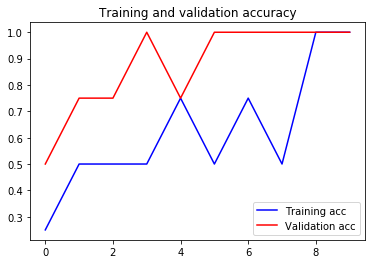

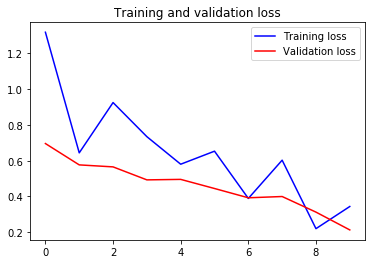

In [21]:
import matplotlib.pyplot as plt
import numpy as np
acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']
 
epochs = range(len(acc))
 
plt.plot(epochs, acc, 'b', label='Training acc')
plt.plot(epochs, val_acc, 'r', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()
 
plt.figure()
 
plt.plot(epochs, loss, 'b', label='Training loss')
plt.plot(epochs, val_loss, 'r', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()
 
plt.show()

In [22]:
from keras.preprocessing.image import img_to_array, load_img
# Create a generator for prediction
validation_generator = validation_datagen.flow_from_directory(
        validation_dir,
        target_size=(image_size, image_size),
        batch_size=val_batchsize,
        class_mode='categorical',
        shuffle=False)
 
# Get the filenames from the generator
fnames = validation_generator.filenames
 
# Get the ground truth from generator
ground_truth = validation_generator.classes
 
# Get the label to class mapping from the generator
label2index = validation_generator.class_indices
 
# Getting the mapping from class index to class label
idx2label = dict((v,k) for k,v in label2index.items())
 
# Get the predictions from the model using the generator
predictions = model.predict_generator(validation_generator, steps=validation_generator.samples/validation_generator.batch_size,verbose=1)
predicted_classes = np.argmax(predictions,axis=1)
 
errors = np.where(predicted_classes != ground_truth)[0]
print("No of errors = {}/{}".format(len(errors),validation_generator.samples))
 
# Show the errors
for i in range(len(errors)):
    pred_class = np.argmax(predictions[errors[i]])
    pred_label = idx2label[pred_class]
     
    title = 'Original label:{}, Prediction :{}, confidence : {:.3f}'.format(
        fnames[errors[i]].split('/')[0],
        pred_label,
        predictions[errors[i]][pred_class])
     
    original = load_img('{}/{}'.format(validation_dir,fnames[errors[i]]))
    plt.figure(figsize=[7,7])
    plt.axis('off')
    plt.title(title)
    plt.imshow(original)
    plt.show()

Found 4 images belonging to 2 classes.
4/4 [==============================] - 0s 97ms/step
No of errors = 0/4


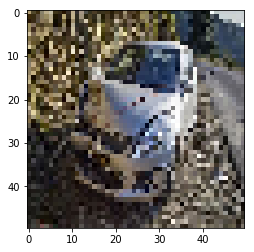

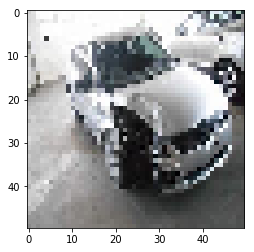

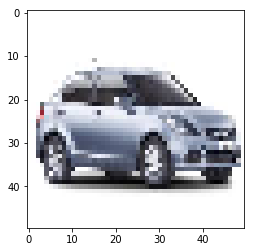

[[0.74665153 0.2533485 ]
 [0.8218276  0.17817242]
 [0.2730755  0.72692454]]
[0 0 1]


In [29]:
from keras.models import load_model
from keras.preprocessing.image import img_to_array, load_img
severity_model = load_model('small_last4.h5')
def prepare_img_256(img_path):
    #urllib.request.urlretrieve(img_path, 'save.jpg') # or other way to upload image
    img = load_img(img_path, target_size=(50, 50)) # this is a PIL image 
    x = img_to_array(img) # this is a Numpy array with shape (3, 256, 256)
     
    x = x.reshape((1,) + x.shape)/255
    
    return x


img_2561 = prepare_img_256('./images/damagedcar/SwiftDamagedFrontCar.jpg')
img_2562 = prepare_img_256('./images/damagedcar/SwiftDamagedFrontCar2.jpg')
img_2563 = prepare_img_256('./images/training_data/front/sd001.jpg')
images = np.vstack([img_2561, img_2562,img_2563])
#images = np.vstack([img_2561])

plt.imshow(img_2561[0])
plt.show()  
plt.imshow(img_2562[0])
plt.show()
plt.imshow(img_2563[0])
plt.show()
pred_label = np.argmax(pred, axis=1)
print(pred)
print(pred_label)